In [27]:
# MANE 4962 Homework 5 Question 1
# Name: Calvin Chan

# For HW 5 Question 1 we will utilize a convolutional neural network model to classify CIFAR-10 dataset
# We will see how a CNN model improve on the accuracy of classification vs fully connected neural network model 

In [28]:
# Load Modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import GridSearchCV 
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10 # Import CIFAR-10 Dataset

In [29]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("training images shapes: ", X_train.shape)
print("testing images shapes: ", X_test.shape)
print("training targets shapes: ", y_train.shape)
print("testing targers shapes: ", y_test.shape)

training images shapes:  (50000, 32, 32, 3)
testing images shapes:  (10000, 32, 32, 3)
training targets shapes:  (50000, 1)
testing targers shapes:  (10000, 1)


In [30]:
# Minimla Data Modification: 

In [31]:
# Will still need to modify the y data to categorical and normzlaizing the X data 

X_train = X_train/255
X_test = X_test/255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [53]:
# Display Data 
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (50000, 32, 32, 3)
X_test shape : (10000, 32, 32, 3)
y_train shape : (50000, 10)
y_test shape : (10000, 10)


In [33]:
# The convolutional neural network model (CNN) will have the following:
    # The first layer is a 2D convolutional layer with 64 filters, each of size (5, 5), and uses the ReLU activation function. 
    # The input shape of the layer should correspond to the dimensions of the input image.

    # The second layer is a max pooling layer of size (2, 2).

    # The third layer is another 2D convolutional layer with 32 filters, each of size (3,3), and uses the ReLU activation function.

    # The fourth layer is another max pooling layer of size (2, 2).

    # The fifth layer is another 2D convolutional layer with 32 filters, each of size (3,3), and uses the ReLU activation function.

    # The sixth layer is a flattened layer which converts the output of the previous layer into a one-dimensional vector.

    # The seventh layer is a dense layer with 64 neurons and uses the ReLU activation function.

    # The eighth and final layer produces estimated probabilities to classify the CIFAR-10 classes.

In [34]:
# Building the model (CNN)
model = Sequential()
model.add(keras.Input(shape=(32, 32, 3))) # Input Layer
model.add(layers.Conv2D(filters = 64, kernel_size = (5,5), strides = (1,1), padding = 'valid', activation = 'relu')) # 1st Layer
model.add(layers.MaxPooling2D(pool_size=(2, 2))) # Second Layer
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu')) # Third Layer
model.add(layers.MaxPooling2D(pool_size=(2, 2))) # Fourth Layer
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu')) # Fifth Layer
model.add(layers.Flatten()) # Sixth Layer
model.add(layers.Dense(64, activation = 'relu')) # Seventh Layer
model.add(layers.Dense(10, activation = 'softmax')) #Eighth Layer that classify using softmax with 10 labels

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,058 (258.04 KB)

 Trainable params: 66,058 (258.04 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Fit Model
history = model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data = (X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.3019 - loss: 1.8812 - val_accuracy: 0.4487 - val_loss: 1.5189
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5026 - loss: 1.3835 - val_accuracy: 0.5638 - val_loss: 1.2327
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.5634 - loss: 1.2153 - val_accuracy: 0.5827 - val_loss: 1.1773
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.6038 - loss: 1.1147 - val_accuracy: 0.6147 - val_loss: 1.0715
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.6349 - loss: 1.0278 - val_accuracy: 0.6377 - val_loss: 1.0237
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.6632 - loss: 0.9600 - val_accuracy: 0.6430 - val_loss: 1.0151
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6747 - loss: 0.9156 - val_accuracy: 0.6399 - val_loss: 1.0095
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.6910 - loss: 0.8805 - 

In [51]:
# Test Accuracy and Loss of the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuarcy:", test_acc)
print("Test Loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6542 - loss: 0.9923
Test Accuarcy: 0.656000018119812
Test Loss: 0.9960642457008362


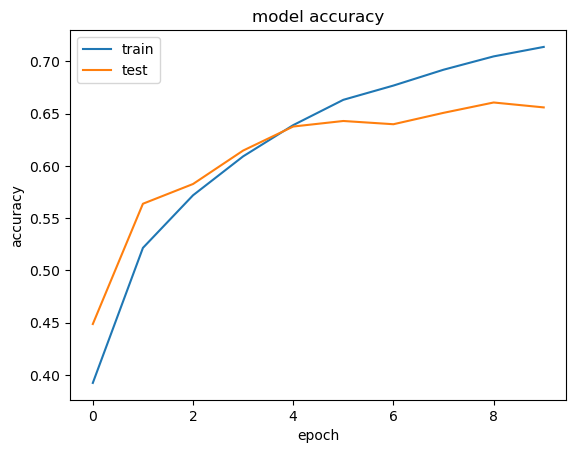

In [37]:
# Question 1b: 
# Plot Training and Validation Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

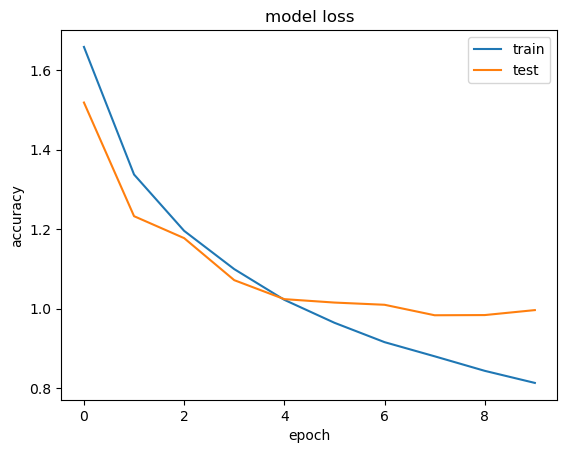

In [38]:
# Plot Loss as well to check: 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()